In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import stats
import statsmodels.stats.power as smp
import statsmodels.api as sm

df = pd.read_csv('data/Validation_Results.csv')

In [2]:
df

,Mass B,CoM B,MoI B,Mass,CoM,MoI
0,1440,224.368001,24.03,1585,199.406477,29.364296
1,1931,229.019650,37.30,1831,226.740362,36.888157
2,1344,210.850658,18.14,1402,192.302097,20.921994
3,2300,174.324410,18.01,2395,191.904575,18.565563
4,2530,255.049015,19.40,2650,213.427915,24.118781
5,1553,244.135208,15.39,1340,282.407649,16.134103
6,2509,181.077332,47.98,2492,237.672291,44.082837
7,2129,278.298401,31.19,2169,288.830912,34.771100


In [11]:
mass = (df['Mass']-df['Mass B'])/df['Mass']
CoM = (df['CoM']-df['CoM B'])/df['CoM']
MoI = (df['MoI']-df['MoI B'])/df['MoI']

#print(mass.abs().mean())



power_analysis = smp.TTestPower()

#power_analysis.power(effect_size, 8, 0.05, df=None, alternative='two-sided')
print('paired t-test p-values for Mass, CoM and MoI:')
print(stats.ttest_rel(df['Mass'].abs(), df['Mass B'].abs())[1])
print(stats.ttest_rel(df['CoM'].abs(), df['CoM B'].abs())[1])
print(stats.ttest_rel(df['MoI'].abs(), df['MoI B'].abs())[1])
print('Power analysis of paired t-test Mass, CoM and MoI:')
print(power_analysis.power((mass.abs().mean()/np.std(mass.abs())), 8, 0.05, df=None, alternative='two-sided'))
print(power_analysis.power((CoM.abs().mean()/np.std(CoM.abs())), 8, 0.05, df=None, alternative='two-sided'))
print(power_analysis.power((MoI.abs().mean()/np.std(MoI.abs())), 8, 0.05, df=None, alternative='two-sided'))

print('mean of mass percentage difference is:', (100*mass).mean())
print('std of mass percentage difference is:', 1.96*np.std(100*mass))
print('normality of mass percentage difference is:', stats.shapiro(100*mass))

print('mean of CoM percentage difference is:', (100*CoM).mean())
print('std of CoM percentage difference is:', 1.96*np.std(100*CoM))
print('normality of mass percentage difference is:', stats.shapiro(100*CoM))

print('mean of MoI percentage difference is:', (100*MoI).mean())
print('std of MoI percentage difference is:', 1.96*np.std(100*MoI))
print('normality of mass percentage difference is:', stats.shapiro(100*MoI))

paired t-test p-values for Mass, CoM and MoI:
0.7201648711167346
0.7146430084613474
0.16388086522857123
Power analysis of paired t-test Mass, CoM and MoI:
0.8645669114857413
0.9760417597651102
0.9600812769302649
mean of mass percentage difference is: 0.19813464526928026
std of mass percentage difference is: 14.253734309312478
normality of mass percentage difference is: ShapiroResult(statistic=0.8782632350921631, pvalue=0.18125058710575104)
mean of CoM percentage difference is: 0.937742481930532
std of CoM percentage difference is: 26.585922472854506
normality of mass percentage difference is: ShapiroResult(statistic=0.9815159440040588, pvalue=0.9700139760971069)
mean of MoI percentage difference is: 7.371768652424905
std of MoI percentage difference is: 17.944227435730884
normality of mass percentage difference is: ShapiroResult(statistic=0.9630281329154968, pvalue=0.8384024500846863)


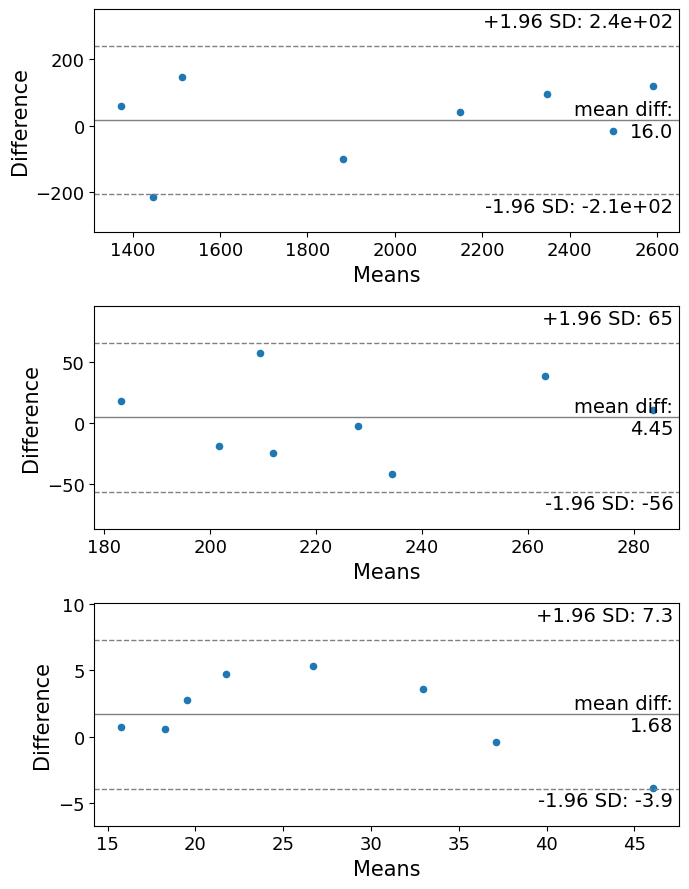

In [41]:
f, ax = plt.subplots(3, figsize = (7,9))
sm.graphics.mean_diff_plot(df['Mass'], df['Mass B'], ax = ax[0])
sm.graphics.mean_diff_plot(df['CoM'], df['CoM B'], ax = ax[1])
sm.graphics.mean_diff_plot(df['MoI'], df['MoI B'], ax = ax[2])
#display Bland-Altman plot
plt.show()
f.savefig('Validation results bland altman.png', bbox_inches='tight')